In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


In [2]:
metacritic = pd.read_csv('~/Desktop/stats 170b/metacritic_clean.csv')
metacritic.drop_duplicates()
print(metacritic.shape)
metacritic.head()

(964, 5)


,imDbId,title,fullTitle,year,items
0,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'IGN', 'author': '', 'link': '', 'rate': '100', 'content': 'Matt Reeves’ violent, ..."
1,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slashfilm', 'author': 'Chris Evangelista', 'link': 'https://www.slashfilm.com/780..."
2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman..."
3,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Consequence', 'author': 'Liz Shannon Miller', 'link': 'https://consequence.net/20..."
4,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Screen Rant', 'author': 'Mae Abdulbaki', 'link': '', 'rate': '80', 'content': 'Wi..."


In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
# remove punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
metacritic['review_punct'] = metacritic['items'].apply(lambda x: remove_punct(x))
metacritic.head()


,imDbId,title,fullTitle,year,items,review_punct
0,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'IGN', 'author': '', 'link': '', 'rate': '100', 'content': 'Matt Reeves’ violent, ...",publisher IGN author link rate content Matt Reeves’ violent thrilling darkly beautiful take o...
1,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slashfilm', 'author': 'Chris Evangelista', 'link': 'https://www.slashfilm.com/780...",publisher Slashfilm author Chris Evangelista link httpswwwslashfilmcomthebatmanreviewthedarkknig...
2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman...",publisher TheWrap author Todd Gilchrist link httpswwwthewrapcomthebatmanreviewrobertpattinsonzoe...
3,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Consequence', 'author': 'Liz Shannon Miller', 'link': 'https://consequence.net/20...",publisher Consequence author Liz Shannon Miller link httpsconsequencenetthebatmanreviewrobertpat...
4,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Screen Rant', 'author': 'Mae Abdulbaki', 'link': '', 'rate': '80', 'content': 'Wi...",publisher Screen Rant author Mae Abdulbaki link rate content With exhilarating action scenes a...


In [5]:
# tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
metacritic['review_tokenized'] = metacritic['review_punct'].apply(lambda x: tokenization(x))
metacritic.head()

,imDbId,title,fullTitle,year,items,review_punct,review_tokenized
0,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'IGN', 'author': '', 'link': '', 'rate': '100', 'content': 'Matt Reeves’ violent, ...",publisher IGN author link rate content Matt Reeves’ violent thrilling darkly beautiful take o...,"[publisher, IGN, author, link, rate, content, Matt, Reeves, violent, thrilling, darkly, beautifu..."
1,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slashfilm', 'author': 'Chris Evangelista', 'link': 'https://www.slashfilm.com/780...",publisher Slashfilm author Chris Evangelista link httpswwwslashfilmcomthebatmanreviewthedarkknig...,"[publisher, Slashfilm, author, Chris, Evangelista, link, httpswwwslashfilmcomthebatmanreviewthed..."
2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman...",publisher TheWrap author Todd Gilchrist link httpswwwthewrapcomthebatmanreviewrobertpattinsonzoe...,"[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti..."
3,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Consequence', 'author': 'Liz Shannon Miller', 'link': 'https://consequence.net/20...",publisher Consequence author Liz Shannon Miller link httpsconsequencenetthebatmanreviewrobertpat...,"[publisher, Consequence, author, Liz, Shannon, Miller, link, httpsconsequencenetthebatmanreviewr..."
4,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Screen Rant', 'author': 'Mae Abdulbaki', 'link': '', 'rate': '80', 'content': 'Wi...",publisher Screen Rant author Mae Abdulbaki link rate content With exhilarating action scenes a...,"[publisher, Screen, Rant, author, Mae, Abdulbaki, link, rate, content, With, exhilarating, actio..."


In [6]:
stopword = nltk.corpus.stopwords.words('english')
#stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
#               'treatment', 'associated', 'patients', 'may','day', 'case','old'])
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
metacritic['review_nonstop'] = metacritic['review_tokenized'].apply(lambda x: remove_stopwords(x))
metacritic.head()

,imDbId,title,fullTitle,year,items,review_punct,review_tokenized,review_nonstop
0,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'IGN', 'author': '', 'link': '', 'rate': '100', 'content': 'Matt Reeves’ violent, ...",publisher IGN author link rate content Matt Reeves’ violent thrilling darkly beautiful take o...,"[publisher, IGN, author, link, rate, content, Matt, Reeves, violent, thrilling, darkly, beautifu...","[publisher, IGN, author, link, rate, content, Matt, Reeves, violent, thrilling, darkly, beautifu..."
1,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slashfilm', 'author': 'Chris Evangelista', 'link': 'https://www.slashfilm.com/780...",publisher Slashfilm author Chris Evangelista link httpswwwslashfilmcomthebatmanreviewthedarkknig...,"[publisher, Slashfilm, author, Chris, Evangelista, link, httpswwwslashfilmcomthebatmanreviewthed...","[publisher, Slashfilm, author, Chris, Evangelista, link, httpswwwslashfilmcomthebatmanreviewthed..."
2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman...",publisher TheWrap author Todd Gilchrist link httpswwwthewrapcomthebatmanreviewrobertpattinsonzoe...,"[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti...","[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti..."
3,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Consequence', 'author': 'Liz Shannon Miller', 'link': 'https://consequence.net/20...",publisher Consequence author Liz Shannon Miller link httpsconsequencenetthebatmanreviewrobertpat...,"[publisher, Consequence, author, Liz, Shannon, Miller, link, httpsconsequencenetthebatmanreviewr...","[publisher, Consequence, author, Liz, Shannon, Miller, link, httpsconsequencenetthebatmanreviewr..."
4,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Screen Rant', 'author': 'Mae Abdulbaki', 'link': '', 'rate': '80', 'content': 'Wi...",publisher Screen Rant author Mae Abdulbaki link rate content With exhilarating action scenes a...,"[publisher, Screen, Rant, author, Mae, Abdulbaki, link, rate, content, With, exhilarating, actio...","[publisher, Screen, Rant, author, Mae, Abdulbaki, link, rate, content, With, exhilarating, actio..."


In [73]:
words = [word for word in words if not word in stopword]

# Print first 10 words
#words

["'",
 ',',
 ':',
 '.',
 "'author",
 "'link",
 "'rate",
 "'content",
 'n',
 '}',
 "'publisher",
 '{',
 '’',
 "'https",
 '``',
 "'the",
 'film',
 'movie',
 "'80",
 '—',
 '”',
 'one',
 '“',
 'like',
 "'s",
 'story',
 "'75",
 "'100",
 "'it",
 "'indiewire",
 "'60",
 "'70",
 '(',
 ')',
 'hollywood',
 'even',
 'fun',
 "'peter",
 "'thewrap",
 'time',
 'guardian',
 'much',
 'reporter',
 "'50",
 'also',
 'way',
 'new',
 'best',
 '?',
 'action',
 'first',
 "'40",
 'feels',
 'makes',
 'movies',
 'still',
 'never',
 "'david",
 'something',
 "'variety",
 'marvel',
 'characters',
 "'90",
 'good',
 'us',
 "'screen",
 'little',
 'playlist',
 'might',
 "'67",
 '–',
 'character',
 'make',
 'bradshaw',
 'enough',
 'feel',
 'films',
 'work',
 "'ign",
 "'matt",
 'yet',
 'may',
 "'empire",
 'telegraph',
 'get',
 "'entertainment",
 'love',
 'weekly',
 'many',
 ';',
 'comedy',
 'funny',
 'well',
 'ehrlich',
 'world',
 'superhero',
 'back',
 'could',
 "'83",
 'two',
 'less',
 'last',
 'magazine',
 'entertainin

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexshlosman/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexshlosman/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
#Stemming and Lammitization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

metacritic['review_stemmed'] = metacritic['review_nonstop'].apply(lambda x: stemming(x))
metacritic.head()

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

metacritic['review_lemmatized'] = metacritic['review_nonstop'].apply(lambda x: lemmatizer(x))
metacritic.head()

,imDbId,title,fullTitle,year,items,review_punct,review_tokenized,review_nonstop,review_stemmed,review_lemmatized
0,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'IGN', 'author': '', 'link': '', 'rate': '100', 'content': 'Matt Reeves’ violent, ...",publisher IGN author link rate content Matt Reeves’ violent thrilling darkly beautiful take o...,"[publisher, IGN, author, link, rate, content, Matt, Reeves, violent, thrilling, darkly, beautifu...","[publisher, IGN, author, link, rate, content, Matt, Reeves, violent, thrilling, darkly, beautifu...","[publish, ign, author, link, rate, content, matt, reev, violent, thrill, darkli, beauti, take, t...","[publisher, IGN, author, link, rate, content, Matt, Reeves, violent, thrilling, darkly, beautifu..."
1,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slashfilm', 'author': 'Chris Evangelista', 'link': 'https://www.slashfilm.com/780...",publisher Slashfilm author Chris Evangelista link httpswwwslashfilmcomthebatmanreviewthedarkknig...,"[publisher, Slashfilm, author, Chris, Evangelista, link, httpswwwslashfilmcomthebatmanreviewthed...","[publisher, Slashfilm, author, Chris, Evangelista, link, httpswwwslashfilmcomthebatmanreviewthed...","[publish, slashfilm, author, chri, evangelista, link, httpswwwslashfilmcomthebatmanreviewthedark...","[publisher, Slashfilm, author, Chris, Evangelista, link, httpswwwslashfilmcomthebatmanreviewthed..."
2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman...",publisher TheWrap author Todd Gilchrist link httpswwwthewrapcomthebatmanreviewrobertpattinsonzoe...,"[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti...","[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti...","[publish, thewrap, author, todd, gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpattins...","[publisher, TheWrap, author, Todd, Gilchrist, link, httpswwwthewrapcomthebatmanreviewrobertpatti..."
3,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Consequence', 'author': 'Liz Shannon Miller', 'link': 'https://consequence.net/20...",publisher Consequence author Liz Shannon Miller link httpsconsequencenetthebatmanreviewrobertpat...,"[publisher, Consequence, author, Liz, Shannon, Miller, link, httpsconsequencenetthebatmanreviewr...","[publisher, Consequence, author, Liz, Shannon, Miller, link, httpsconsequencenetthebatmanreviewr...","[publish, consequ, author, liz, shannon, miller, link, httpsconsequencenetthebatmanreviewrobertp...","[publisher, Consequence, author, Liz, Shannon, Miller, link, httpsconsequencenetthebatmanreviewr..."
4,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Screen Rant', 'author': 'Mae Abdulbaki', 'link': '', 'rate': '80', 'content': 'Wi...",publisher Screen Rant author Mae Abdulbaki link rate content With exhilarating action scenes a...,"[publisher, Screen, Rant, author, Mae, Abdulbaki, link, rate, content, With, exhilarating, actio...","[publisher, Screen, Rant, author, Mae, Abdulbaki, link, rate, content, With, exhilarating, actio...","[publish, screen, rant, author, mae, abdulbaki, link, rate, content, with, exhilar, action, scen...","[publisher, Screen, Rant, author, Mae, Abdulbaki, link, rate, content, With, exhilarating, actio..."


In [8]:
# cleaning 
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

#vectorisation
countVectorizer = CountVectorizer(analyzer=clean_text, max_features = 1000) 
countVector = countVectorizer.fit_transform(metacritic['items'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()


964 Number of reviews has 1000 words


,,abdulbaki,abel,abil,absolut,accomplish,achiev,across,act,action,...,writerdirector,written,wrong,xan,ye,year,yet,york,young,zhao
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
count_vect_df.to_csv('vector.csv')

# WORD EMBEDDINGS

In [10]:
pip install gensim

You should consider upgrading via the '/Users/alexshlosman/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [12]:
corpus_text = 'n'.join(metacritic[:1000]['items'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [40]:
model1 = gensim.models.Word2Vec(data,  min_count = 1, window = 5, sg=0) 
model2 = gensim.models.Word2Vec(data,  min_count = 1,  window = 5, sg = 1)

In [66]:
print(model1)

Word2Vec(vocab=8368, vector_size=100, alpha=0.025)


In [41]:
model1.wv.most_similar(positive='movie')

[('but', 0.9997195601463318),
 ('also', 0.9991913437843323),
 ('there', 0.9986759424209595),
 ('the', 0.9985132813453674),
 ('not', 0.9984222054481506),
 ('little', 0.9983115196228027),
 ('first', 0.9983075857162476),
 ('as', 0.9982575178146362),
 ('he', 0.9982434511184692),
 ('always', 0.9981566071510315)]

In [42]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in model1.wv.vocab]
    return np.mean(model1[doc], axis=0)

In [55]:
words = list(model1.wv.index_to_key)

In [63]:
#model1.wv.key_to_index

{"'": 0,
 ',': 1,
 ':': 2,
 'the': 3,
 '.': 4,
 'a': 5,
 'and': 6,
 'of': 7,
 "'author": 8,
 "'link": 9,
 "'rate": 10,
 "'content": 11,
 'n': 12,
 '}': 13,
 "'publisher": 14,
 '{': 15,
 '’': 16,
 'to': 17,
 "'https": 18,
 'it': 19,
 's': 20,
 'is': 21,
 'that': 22,
 'in': 23,
 '``': 24,
 "'the": 25,
 'as': 26,
 'but': 27,
 'with': 28,
 'its': 29,
 'film': 30,
 'for': 31,
 'this': 32,
 'be': 33,
 'on': 34,
 'movie': 35,
 'an': 36,
 't': 37,
 'you': 38,
 'all': 39,
 "'80": 40,
 'more': 41,
 'at': 42,
 'not': 43,
 '—': 44,
 '”': 45,
 'one': 46,
 'from': 47,
 'by': 48,
 'than': 49,
 '“': 50,
 'like': 51,
 "'s": 52,
 'story': 53,
 'are': 54,
 'has': 55,
 'have': 56,
 'his': 57,
 'so': 58,
 "'75": 59,
 "'100": 60,
 'most': 61,
 "'it": 62,
 'or': 63,
 'up': 64,
 "'indiewire": 65,
 'about': 66,
 'out': 67,
 'what': 68,
 "'60": 69,
 "'70": 70,
 'just': 71,
 '(': 72,
 ')': 73,
 'hollywood': 74,
 'can': 75,
 'they': 76,
 'there': 77,
 'into': 78,
 'even': 79,
 'if': 80,
 'fun': 81,
 "'peter": 82,

In [74]:
vocab = list(model1.wv.index_to_key)
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model1.wv[word] for word in words if word in vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
',-0.065093,0.136560,0.779877,2.513040,0.149200,-2.579255,0.768182,3.534055,-3.205513,-1.501216,...,0.571007,2.195205,2.629556,0.940566,3.907151,2.288798,1.107095,-1.160268,0.894356,-0.057374
",",-0.040612,0.030162,0.432832,1.703065,0.132906,-1.806984,0.601826,2.306931,-2.226948,-1.124733,...,0.431704,1.313254,1.605600,0.721678,2.544782,1.565840,0.628879,-1.017323,0.438840,-0.332465
:,-0.081130,0.099355,0.685883,2.330720,0.179140,-2.407842,0.698081,3.260189,-3.023048,-1.364463,...,0.506264,2.023452,2.403317,0.898161,3.619536,2.131814,1.011201,-1.146017,0.846328,-0.201244


In [76]:
df.to_csv('word_embeddings.csv')

In [ ]:
### dimensionality reduction

In [78]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df)

In [84]:
tsneDF = pd.DataFrame(tsne_df)

In [85]:
tsneDF.to_csv('tsne8k.csv')

/Users/alexshlosman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ModuleNotFoundError: No module named 'adjustText'

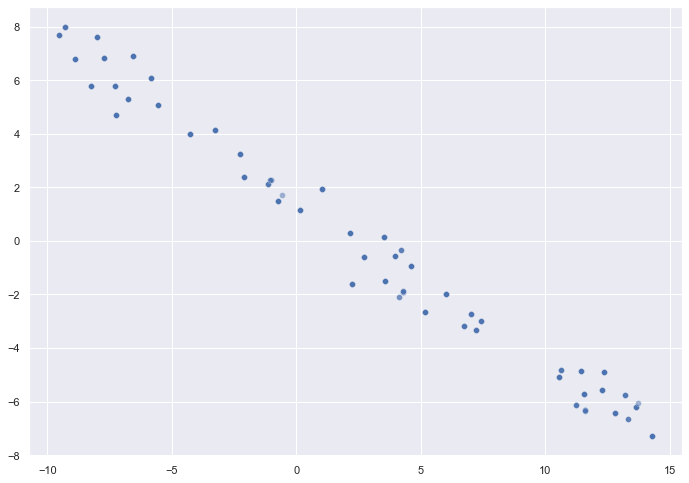

In [107]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))
plt.title('Dimensionality Reduction Plot')
plt.show()


In [99]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    vocab = list(word2vec_model.wv.index_to_key)
    doc = [word for word in doc if word in vocab]
    return np.mean(word2vec_model.wv[doc], axis=0)

# Our earlier preprocessing was done when we were dealing only with word vectors
# Here, we need each document to remain a document 
def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stopword]
    doc = [word for word in doc if word.isalpha()] 
    return doc


# Function that will help us drop documents that have no word vectors in word2vec
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    vocab = list(word2vec_model.wv.index_to_key)
    return not all(word not in vocab for word in doc)

# Filter out documents
def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [89]:
movie_titles = metacritic['title']
# Create a list of strings, one for each title
titles_list = [title for title in movie_titles]

In [100]:
# Preprocess the corpus
corpus = [preprocess(title) for title in titles_list]

# Remove docs that don't include any words in W2V's vocab
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: has_vector_representation(model1, doc))

# Filter out any empty docs
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: (len(doc) != 0))
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model1, doc))
    
X = np.array(x) # list to array

0 docs removed
0 docs removed


In [103]:
tsneDF = pd.DataFrame(x)

In [104]:
tsneDF.to_csv('doc_reduction.csv')

/Users/alexshlosman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ModuleNotFoundError: No module named 'adjustText'

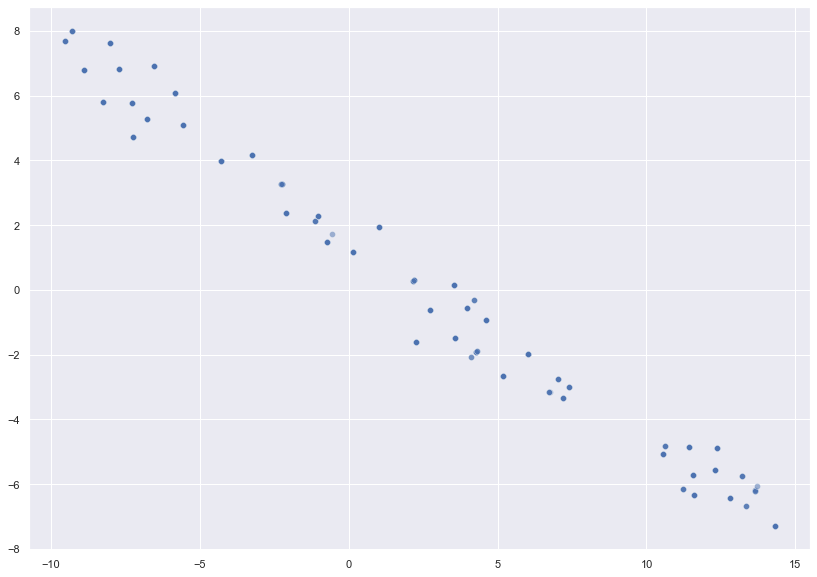

In [101]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Again use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X[:400])
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

from adjustText import adjust_text
texts = []
titles_to_plot = list(np.arange(0, 400, 40)) # plots every 40th title in first 400 titles

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], titles_list[title], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15, random_state=10)

# as a reminder, x is the array with our 300-dimensional vectors
reduced_vecs = pca.fit_transform(x)
df_w_vectors = pd.DataFrame(reduced_vecs)

df_w_vectors['Title'] = titles_list
# Use pd.concat to match original titles with their vectors
main_w_vectors = pd.concat((df_w_vectors, metacritic), axis=1)

# Get rid of vectors that couldn't be matched with the main_df
main_w_vectors.dropna(axis=0, inplace=True)

In [ ]:
# Drop all non-numeric, non-dummy columns, for feeding into the models
cols_to_drop = ['imDbId', 'title', 'fullTitle', 'year'] 

data_only_df = pd.get_dummies(main_w_vectors, columns = ['items']).drop(columns=cols_to_drop)

# Standardize DaysSinceEpoch since the raw numbers are larger in magnitude 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reshape so we can feed the column to the scaler
standardized_days = np.array(data_only_df['DaysSinceEpoch']).reshape(-1, 1)
data_only_df['StandardizedDays'] = scaler.fit_transform(standardized_days)

# Drop the raw column; we don't need it anymore
data_only_df.drop(columns=['DaysSinceEpoch'], inplace=True)

# Look at the new range
data_only_df['StandardizedDays'].describe()

# Sentiment Analysis Computation

In [18]:
# using method 1 from
#https://www.analyticsvidhya.com/blog/2021/12/different-methods-for-calculating-sentiment-score-of-text/

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [52]:
tweet_analysis = pd.read_csv('~/Desktop/stats 170b/movie_details_clean.csv')

In [88]:
metacritic_analysis = pd.read_csv('~/Desktop/stats 170b/metacritic_clean.csv')

In [20]:
def text_prep(x):
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
    
     return lemmatize

In [53]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [31]:
file = open('/Users/alexshlosman/Desktop/stats 170b/negative-words.txt', 'r',encoding = "ISO-8859-1")
neg_words = file.read().split()
file = open('/Users/alexshlosman/Desktop/stats 170b/positive-words.txt', 'r',encoding = "ISO-8859-1")
pos_words = file.read().split()

In [89]:
preprocess_tag = [text_prep(i) for i in metacritic_analysis['items']]
metacritic_analysis["preprocess_txt"] = preprocess_tag

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexshlosman/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [90]:
metacritic_analysis['total_len'] = metacritic_analysis['preprocess_txt'].map(lambda x: len(x))

In [91]:
num_pos = metacritic_analysis['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
metacritic_analysis['pos_count'] = num_pos
num_neg = metacritic_analysis['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
metacritic_analysis['neg_count'] = num_neg

In [92]:
metacritic_analysis['sentiment'] = round((metacritic_analysis['pos_count'] - metacritic_analysis['neg_count']) / metacritic_analysis['total_len'], 2)

In [93]:
metacritic_analysis.head()

,imDbId,title,fullTitle,year,items,preprocess_txt,total_len,pos_count,neg_count,sentiment
0,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'IGN', 'author': '', 'link': '', 'rate': '100', 'content': 'Matt Reeves’ violent, ...","[publisher, ign, author, link, rate, content, matt, reef, violent, thrilling, darkly, beautiful,...",18,2,1,0.06
1,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Slashfilm', 'author': 'Chris Evangelista', 'link': 'https://www.slashfilm.com/780...","[publisher, slashfilm, author, chris, evangelista, link, http, www, slashfilm, com, batman, revi...",37,2,1,0.03
2,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'TheWrap', 'author': 'Todd Gilchrist', 'link': 'https://www.thewrap.com/the-batman...","[publisher, thewrap, author, todd, gilchrist, link, http, www, thewrap, com, batman, review, rob...",36,1,1,0.00
3,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Consequence', 'author': 'Liz Shannon Miller', 'link': 'https://consequence.net/20...","[publisher, consequence, author, liz, shannon, miller, link, http, consequence, net, batman, rev...",41,4,1,0.07
4,tt1877830,The Batman,The Batman (2022),2022,"{'publisher': 'Screen Rant', 'author': 'Mae Abdulbaki', 'link': '', 'rate': '80', 'content': 'Wi...","[publisher, screen, rant, author, mae, abdulbaki, link, rate, content, exhilarating, action, sce...",24,3,1,0.08


In [60]:
tweet_analysis.to_csv('tweet_sentiment_calc.csv')

In [94]:
metacritic_analysis.to_csv('metacritic_sentiment_calc.csv')

<AxesSubplot:xlabel='pos_count', ylabel='count'>

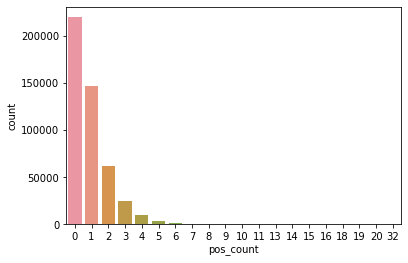

In [62]:
import seaborn as sns
sns.countplot(x='pos_count', data=tweet_analysis)

In [64]:
tweet_analysis['neutral'] = tweet_analysis['total_len'] - (tweet_analysis['pos_count'] + tweet_analysis['neg_count'])


In [80]:
df = tweet_analysis[['sentiment','total_len',]]

Text(0.5, 1.0, 'Histogram of Sentiment in Tweets')

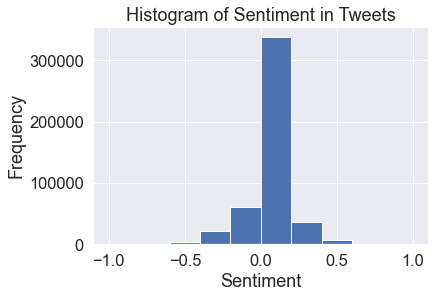

In [87]:
sns.set(font_scale = 1.5)
plt.hist('sentiment', data = tweet_analysis)
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.title('Histogram of Sentiment in Tweets')

In [96]:
from wordcloud import WordCloud

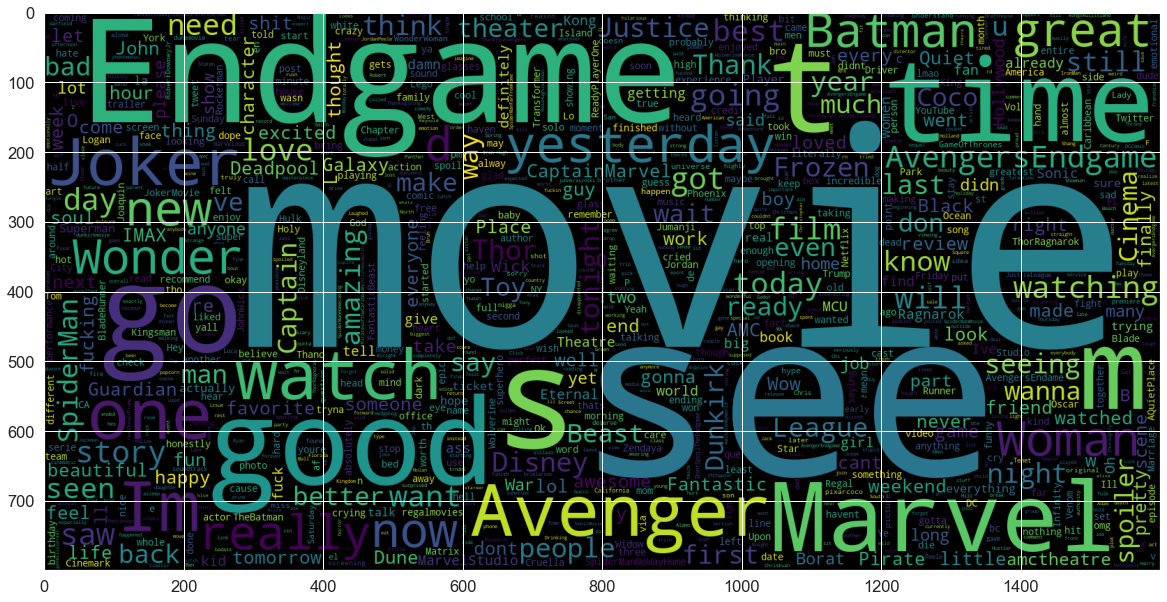

In [100]:
data_pos = tweets['tweets_punct']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [159]:
### VADAR COMPOUND
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
df = pd.read_csv('~/Desktop/stats 170b/movie_details_clean.csv')


In [161]:
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['text']]
df['sentiment_score'] = polarity

In [163]:
score_dict= df['text'].apply(lambda items:sent.polarity_scores(items))

In [164]:
todf = dict()
for i in score_dict:
    for row in i: 
        if row not in todf.keys():
            todf[row] = [i[row]]
        else:
            todf[row].append(i[row])

In [165]:
new_d = pd.DataFrame.from_dict(todf)

In [166]:
new_d

,neg,neu,pos,compound
0,0.000,0.409,0.591,0.9323
1,0.035,0.647,0.318,0.8910
2,0.000,1.000,0.000,0.0000
3,0.000,0.880,0.120,0.5267
4,0.073,0.853,0.075,0.0121
...,...,...,...,...
469164,0.132,0.457,0.411,0.6704
469165,0.000,0.625,0.375,0.5574
469166,0.000,0.704,0.296,0.7430
469167,0.000,0.637,0.363,0.8126


In [167]:
blah = pd.merge(df, new_d, right_index = True, left_index = True)

In [168]:
blah.to_csv('twitter_vader.csv')

In [106]:
df.to_csv('metacritic_vader.csv')

Text(0.5, 1.0, 'Histogram of Compound Sentiment in Tweets')

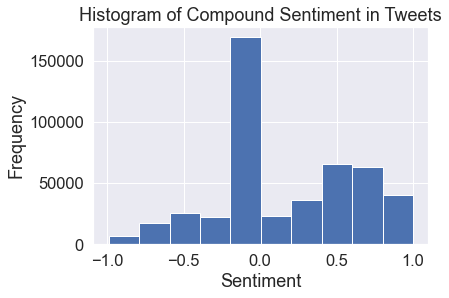

In [171]:
sns.set(font_scale = 1.5)
plt.hist('sentiment_score', data = df)
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.title('Histogram of Compound Sentiment in Tweets')

In [115]:
score_dict= df['items'].apply(lambda items:sent.polarity_scores(items))

In [116]:
score_dict

0       {'neg': 0.109, 'neu': 0.696, 'pos': 0.195, 'compound': 0.4767}
1                {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2         {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5859}
3         {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8979}
4         {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6808}
                                    ...                               
959       {'neg': 0.061, 'neu': 0.878, 'pos': 0.061, 'compound': -0.0}
960        {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.8299}
961    {'neg': 0.098, 'neu': 0.871, 'pos': 0.032, 'compound': -0.4466}
962    {'neg': 0.191, 'neu': 0.707, 'pos': 0.102, 'compound': -0.6734}
963              {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Name: items, Length: 964, dtype: object

In [120]:
new_d = pd.Series(score_dict)

In [121]:
new_d

0       {'neg': 0.109, 'neu': 0.696, 'pos': 0.195, 'compound': 0.4767}
1                {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2         {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5859}
3         {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8979}
4         {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6808}
                                    ...                               
959       {'neg': 0.061, 'neu': 0.878, 'pos': 0.061, 'compound': -0.0}
960        {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.8299}
961    {'neg': 0.098, 'neu': 0.871, 'pos': 0.032, 'compound': -0.4466}
962    {'neg': 0.191, 'neu': 0.707, 'pos': 0.102, 'compound': -0.6734}
963              {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Name: items, Length: 964, dtype: object

In [151]:
new_d = pd.DataFrame.from_dict(score_dict.values)

In [152]:
new_d

,0
0,"{'neg': 0.109, 'neu': 0.696, 'pos': 0.195, 'compound': 0.4767}"
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,"{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5859}"
3,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8979}"
4,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6808}"
...,...
959,"{'neg': 0.061, 'neu': 0.878, 'pos': 0.061, 'compound': -0.0}"
960,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.8299}"
961,"{'neg': 0.098, 'neu': 0.871, 'pos': 0.032, 'compound': -0.4466}"
962,"{'neg': 0.191, 'neu': 0.707, 'pos': 0.102, 'compound': -0.6734}"


In [1]:
#pd.DataFrame.from_dict(score_dict, orient='index', columns = ['neg', 'neu', 'pos', 'compound'], )

In [141]:
pd.DataFrame([score_dict], columns=score_dict.keys())

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
items,"{'neg': 0.109, 'neu': 0.696, 'pos': 0.195, 'compound': 0.4767}","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}","{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5859}","{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8979}","{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6808}","{'neg': 0.032, 'neu': 0.88, 'pos': 0.089, 'compound': 0.7278}","{'neg': 0.061, 'neu': 0.791, 'pos': 0.148, 'compound': 0.5053}","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}","{'neg': 0.09, 'neu': 0.789, 'pos': 0.12, 'compound': 0.2021}","{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.7964}",...,"{'neg': 0.056, 'neu': 0.847, 'pos': 0.097, 'compound': 0.3085}","{'neg': 0.203, 'neu': 0.73, 'pos': 0.068, 'compound': -0.7184}","{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.3506}","{'neg': 0.17, 'neu': 0.7, 'pos': 0.129, 'compound': -0.5423}","{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.8462}","{'neg': 0.061, 'neu': 0.878, 'pos': 0.061, 'compound': -0.0}","{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.8299}","{'neg': 0.098, 'neu': 0.871, 'pos': 0.032, 'compound': -0.4466}","{'neg': 0.191, 'neu': 0.707, 'pos': 0.102, 'compound': -0.6734}","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [143]:
pd.DataFrame.from_dict(score_dict)

,items
0,"{'neg': 0.109, 'neu': 0.696, 'pos': 0.195, 'compound': 0.4767}"
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,"{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5859}"
3,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8979}"
4,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6808}"
...,...
959,"{'neg': 0.061, 'neu': 0.878, 'pos': 0.061, 'compound': -0.0}"
960,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.8299}"
961,"{'neg': 0.098, 'neu': 0.871, 'pos': 0.032, 'compound': -0.4466}"
962,"{'neg': 0.191, 'neu': 0.707, 'pos': 0.102, 'compound': -0.6734}"


In [138]:
new_d

,items
0,"{'neg': 0.109, 'neu': 0.696, 'pos': 0.195, 'compound': 0.4767}"
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,"{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5859}"
3,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.8979}"
4,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6808}"
...,...
959,"{'neg': 0.061, 'neu': 0.878, 'pos': 0.061, 'compound': -0.0}"
960,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.8299}"
961,"{'neg': 0.098, 'neu': 0.871, 'pos': 0.032, 'compound': -0.4466}"
962,"{'neg': 0.191, 'neu': 0.707, 'pos': 0.102, 'compound': -0.6734}"
